In [19]:
batch_size = 4096
STROKE_COUNT = 196
TRAIN_SAMPLES = 750
VALID_SAMPLES = 75
TEST_SAMPLES = 50

In [20]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from keras.metrics import top_k_categorical_accuracy
def top_3_accuracy(x,y): return top_k_categorical_accuracy(x,y, 3)
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
from glob import glob
import gc
gc.enable()
def get_available_gpus():
    from tensorflow.python.client import device_lib
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']
base_dir = os.path.join('..', 'input')
test_path = os.path.join(base_dir, 'test_simplified.csv')

In [21]:
from ast import literal_eval
ALL_TRAIN_PATHS = glob(os.path.join(base_dir, 'train_simplified', '*.csv'))
COL_NAMES = ['countrycode', 'drawing', 'key_id', 'recognized', 'timestamp', 'word']

def _stack_it(raw_strokes):
    """preprocess the string and make 
    a standard Nx3 stroke vector"""
    stroke_vec = literal_eval(raw_strokes) # string->list
    # unwrap the list
    in_strokes = [(xi,yi,i)  
     for i,(x,y) in enumerate(stroke_vec) 
     for xi,yi in zip(x,y)]
    c_strokes = np.stack(in_strokes)
    # replace stroke id with 1 for continue, 2 for new
    c_strokes[:,2] = [1]+np.diff(c_strokes[:,2]).tolist()
    c_strokes[:,2] += 1 # since 0 is no stroke
    # pad the strokes with zeros
    return pad_sequences(c_strokes.swapaxes(0, 1), 
                         maxlen=STROKE_COUNT, 
                         padding='post').swapaxes(0, 1)
def read_batch(samples=5, 
               start_row=0,
               max_rows = 1000):
    """
    load and process the csv files
    this function is horribly inefficient but simple
    """
    out_df_list = []
    for c_path in ALL_TRAIN_PATHS:
        c_df = pd.read_csv(c_path, nrows=max_rows, skiprows=start_row)
        c_df.columns=COL_NAMES
        out_df_list += [c_df.sample(samples)[['drawing', 'word']]]
    full_df = pd.concat(out_df_list)
    full_df['drawing'] = full_df['drawing'].\
        map(_stack_it)
    
    return full_df

In [22]:
train_args = dict(samples=TRAIN_SAMPLES, 
                  start_row=0, 
                  max_rows=int(TRAIN_SAMPLES*1.5))
valid_args = dict(samples=VALID_SAMPLES, 
                  start_row=train_args['max_rows']+1, 
                  max_rows=VALID_SAMPLES+25)
test_args = dict(samples=TEST_SAMPLES, 
                 start_row=valid_args['max_rows']+train_args['max_rows']+1, 
                 max_rows=TEST_SAMPLES+25)
train_df = read_batch(**train_args)
valid_df = read_batch(**valid_args)
test_df = read_batch(**test_args)
word_encoder = LabelEncoder()
word_encoder.fit(train_df['word'])
print('words', len(word_encoder.classes_), '=>', ', '.join([x for x in word_encoder.classes_]))

words 340 => The Eiffel Tower, The Great Wall of China, The Mona Lisa, airplane, alarm clock, ambulance, angel, animal migration, ant, anvil, apple, arm, asparagus, axe, backpack, banana, bandage, barn, baseball, baseball bat, basket, basketball, bat, bathtub, beach, bear, beard, bed, bee, belt, bench, bicycle, binoculars, bird, birthday cake, blackberry, blueberry, book, boomerang, bottlecap, bowtie, bracelet, brain, bread, bridge, broccoli, broom, bucket, bulldozer, bus, bush, butterfly, cactus, cake, calculator, calendar, camel, camera, camouflage, campfire, candle, cannon, canoe, car, carrot, castle, cat, ceiling fan, cell phone, cello, chair, chandelier, church, circle, clarinet, clock, cloud, coffee cup, compass, computer, cookie, cooler, couch, cow, crab, crayon, crocodile, crown, cruise ship, cup, diamond, dishwasher, diving board, dog, dolphin, donut, door, dragon, dresser, drill, drums, duck, dumbbell, ear, elbow, elephant, envelope, eraser, eye, eyeglasses, face, fan, feathe

In [44]:
def get_Xy(in_df):
    #print("in_df shape :", in_df.shape) # (255000,2) for train&vaild, (17000,2) for test
    #print(in_df.iloc[0][0].shape) #(196,3) 
    X = np.stack(in_df['drawing'], 0)
    #print("X shape : ", X.shape) #(255000,196,3) for train&vaild, (17000,196,3) for test
    y = to_categorical(word_encoder.transform(in_df['word'].values))
    #print(y.shape) # (255000, 340) for train&vaild, (17000,340) for test 
    # 340 = len(word_encoder.classes_)
    return X, y
train_X, train_y = get_Xy(train_df)
valid_X, valid_y = get_Xy(valid_df)
test_X, test_y = get_Xy(test_df)
print(train_X.shape)

(255000, 196, 3)


ig Figure(1152x1152)
m_axs.shape (3, 3)
rand_idxs.shape  (9,)
train_X[c_id].shape (196, 3)
test_arr.shape :  (18, 3)
lab_idx.shape :  (18,)
train_X[c_id].shape (196, 3)
test_arr.shape :  (25, 3)
lab_idx.shape :  (25,)
train_X[c_id].shape (196, 3)
test_arr.shape :  (37, 3)
lab_idx.shape :  (37,)
train_X[c_id].shape (196, 3)
test_arr.shape :  (32, 3)
lab_idx.shape :  (32,)
train_X[c_id].shape (196, 3)
test_arr.shape :  (31, 3)
lab_idx.shape :  (31,)
train_X[c_id].shape (196, 3)
test_arr.shape :  (61, 3)
lab_idx.shape :  (61,)
train_X[c_id].shape (196, 3)
test_arr.shape :  (35, 3)
lab_idx.shape :  (35,)
train_X[c_id].shape (196, 3)
test_arr.shape :  (40, 3)
lab_idx.shape :  (40,)
train_X[c_id].shape (196, 3)
test_arr.shape :  (37, 3)
lab_idx.shape :  (37,)


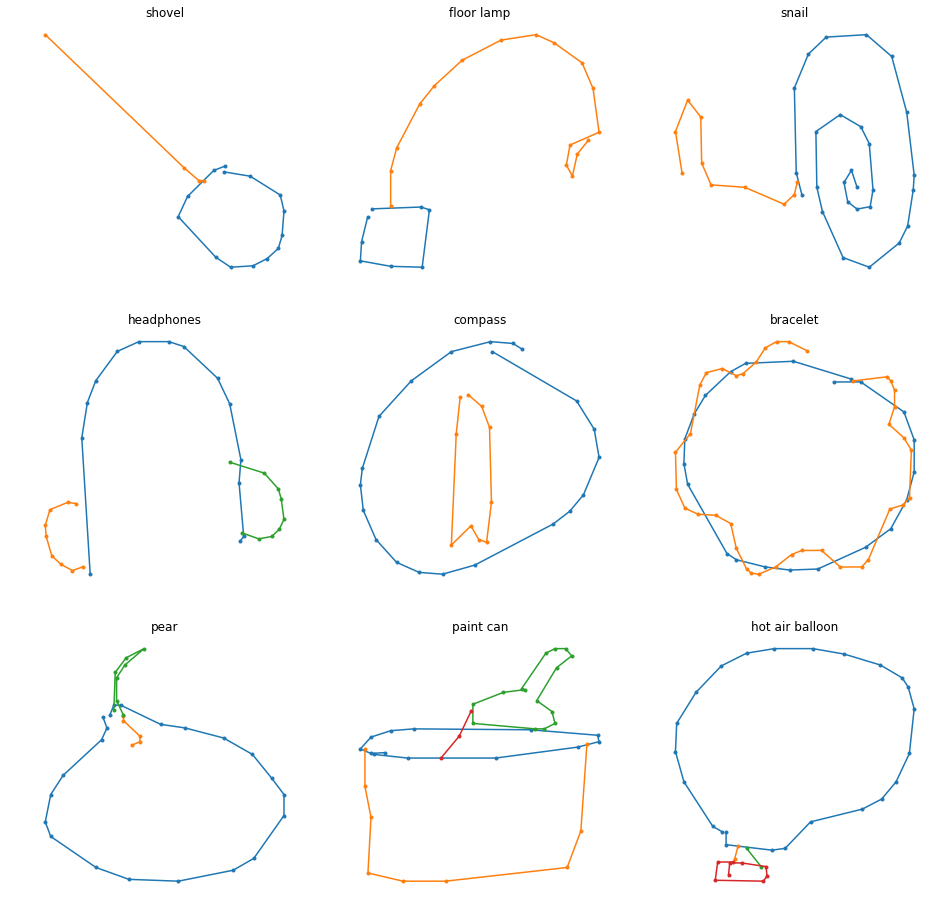

In [62]:
ig, m_axs = plt.subplots(3,3, figsize = (16, 16))
print("ig", ig) # Figure(1152x1152)
print("m_axs.shape", m_axs.shape) # (3, 3)
rand_idxs = np.random.choice(range(train_X.shape[0]), size = 9) 
print("rand_idxs.shape ", rand_idxs.shape) # (9,)
for c_id, c_ax in zip(rand_idxs, m_axs.flatten()):
    test_arr = train_X[c_id]
    print("train_X[c_id].shape",train_X[c_id].shape) # (196, 3)
    test_arr = test_arr[test_arr[:,2]>0, :] # only keep valid points
    #print("test_arr : ", test_arr)
    print("test_arr.shape : ", test_arr.shape) # (?,3)
    lab_idx = np.cumsum(test_arr[:,2]-1)
    #print("lab_idx : ", lab_idx) 
    print("lab_idx.shape : ", lab_idx.shape) # (/,)
    for i in np.unique(lab_idx):
        c_ax.plot(test_arr[lab_idx==i,0], 
                np.max(test_arr[:,1])-test_arr[lab_idx==i,1], '.-') 
    c_ax.axis('off')
    c_ax.set_title(word_encoder.classes_[np.argmax(train_y[c_id])])

In [63]:
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv1D, LSTM, Dense, Dropout
if len(get_available_gpus())>0:
    # https://twitter.com/fchollet/status/918170264608817152?lang=en
    from keras.layers import CuDNNLSTM as LSTM # this one is about 3x faster on GPU instances
stroke_read_model = Sequential()
stroke_read_model.add(BatchNormalization(input_shape = (None,)+train_X.shape[2:]))
# train_X.shape[2:] = (254998, 196, 3)
# (None,) + train_X.shape[2:] = (None, 254998, 196, 3)
# filter count and length are taken from the script https://github.com/tensorflow/models/blob/master/tutorials/rnn/quickdraw/train_model.py
stroke_read_model.add(Conv1D(48, (5,)))
stroke_read_model.add(Dropout(0.3))
stroke_read_model.add(Conv1D(64, (5,)))
stroke_read_model.add(Dropout(0.3))
stroke_read_model.add(Conv1D(96, (3,)))
stroke_read_model.add(Dropout(0.3))
stroke_read_model.add(LSTM(128, return_sequences = True))
stroke_read_model.add(Dropout(0.3))
stroke_read_model.add(LSTM(128, return_sequences = False))
stroke_read_model.add(Dropout(0.3))
stroke_read_model.add(Dense(512))
stroke_read_model.add(Dropout(0.3))
stroke_read_model.add(Dense(len(word_encoder.classes_), activation = 'softmax'))
stroke_read_model.compile(optimizer = 'adam', 
                          loss = 'categorical_crossentropy', 
                          metrics = ['categorical_accuracy', top_3_accuracy])
stroke_read_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, None, 3)           12        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 48)          768       
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 48)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 64)          15424     
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
conv1d_3 (Conv1D)    

In [69]:
weight_path="{}_weights.best.hdf5".format('stroke_lstm_model')
print(weight_path)
checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)


reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, 
                                   verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=5) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]


stroke_lstm_model_weights.best.hdf5


/opt/conda/lib/python3.6/site-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [71]:
from IPython.display import clear_output
stroke_read_model.fit(train_X, train_y,
                      validation_data = (valid_X, valid_y), 
                      batch_size = batch_size,
                      epochs = 50,
                      callbacks = callbacks_list)
stroke_read_model.summary()
#clear_output()

Train on 255000 samples, validate on 25500 samples
Epoch 1/50
255000/255000 [==============================] - 24s 93us/step - loss: 2.4304 - categorical_accuracy: 0.4201 - top_3_accuracy: 0.6369 - val_loss: 2.1394 - val_categorical_accuracy: 0.4863 - val_top_3_accuracy: 0.6931

Epoch 00001: val_loss improved from 2.17737 to 2.13941, saving model to stroke_lstm_model_weights.best.hdf5
Epoch 2/50
255000/255000 [==============================] - 24s 93us/step - loss: 2.4127 - categorical_accuracy: 0.4234 - top_3_accuracy: 0.6404 - val_loss: 2.1185 - val_categorical_accuracy: 0.4868 - val_top_3_accuracy: 0.6974

Epoch 00002: val_loss improved from 2.13941 to 2.11852, saving model to stroke_lstm_model_weights.best.hdf5
Epoch 3/50
255000/255000 [==============================] - 24s 93us/step - loss: 2.3913 - categorical_accuracy: 0.4282 - top_3_accuracy: 0.6446 - val_loss: 2.1106 - val_categorical_accuracy: 0.4909 - val_top_3_accuracy: 0.7009

Epoch 00003: val_loss improved from 2.11852 to


Epoch 00026: val_loss did not improve from 1.85667
Epoch 27/50
255000/255000 [==============================] - 24s 93us/step - loss: 2.0815 - categorical_accuracy: 0.4932 - top_3_accuracy: 0.7058 - val_loss: 1.8556 - val_categorical_accuracy: 0.5480 - val_top_3_accuracy: 0.7488

Epoch 00027: val_loss improved from 1.85667 to 1.85557, saving model to stroke_lstm_model_weights.best.hdf5
Epoch 28/50
255000/255000 [==============================] - 24s 94us/step - loss: 2.0656 - categorical_accuracy: 0.4981 - top_3_accuracy: 0.7088 - val_loss: 1.8490 - val_categorical_accuracy: 0.5460 - val_top_3_accuracy: 0.7484

Epoch 00028: val_loss improved from 1.85557 to 1.84898, saving model to stroke_lstm_model_weights.best.hdf5
Epoch 29/50
255000/255000 [==============================] - 24s 94us/step - loss: 2.0617 - categorical_accuracy: 0.4975 - top_3_accuracy: 0.7106 - val_loss: 1.8446 - val_categorical_accuracy: 0.5470 - val_top_3_accuracy: 0.7504

Epoch 00029: val_loss improved from 1.8489

In [66]:
stroke_read_model.load_weights(weight_path)
lstm_results = stroke_read_model.evaluate(test_X, test_y, batch_size = 4096)
print('Accuracy: %2.1f%%, Top 3 Accuracy %2.1f%%' % (100*lstm_results[1], 100*lstm_results[2]))

17000/17000 [==============================] - 1s 34us/step
Accuracy: 46.5%, Top 3 Accuracy 68.1%


In [72]:
sub_df = pd.read_csv(test_path)
sub_df['drawing'] = sub_df['drawing'].map(_stack_it)

In [73]:
sub_vec = np.stack(sub_df['drawing'].values, 0)
sub_pred = stroke_read_model.predict(sub_vec, verbose=True, batch_size=4096)

112199/112199 [==============================] - 4s 34us/step


In [74]:
top_3_pred = [word_encoder.classes_[np.argsort(-1*c_pred)[:3]] for c_pred in sub_pred]

In [75]:
top_3_pred = [' '.join([col.replace(' ', '_') for col in row]) for row in top_3_pred]
top_3_pred[:3]

['radio stereo stove',
 'hamburger hockey_puck bottlecap',
 'castle The_Great_Wall_of_China crown']

In [76]:
sub_df['word'] = top_3_pred
sub_df[['key_id', 'word']].to_csv('submission.csv', index=False)